In [16]:
#importing modules
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [17]:
#creating a new panda data frame from "bom.movie_gross.csv"csv file
movie_gross = pd.read_csv("bom.movie_gross.csv", index_col=0)
#checking dataframe info
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [18]:
# Convert 'foreign_gross' column to numeric type
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

#droping missing values
movie_gross = movie_gross.dropna(subset=['domestic_gross'],)

movie_gross = movie_gross.dropna(subset=['foreign_gross'],)

movie_gross = movie_gross.dropna(subset=['year'],)
# verifying changes
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2004 entries, Toy Story 3 to Antonio Lopez 1970: Sex Fashion & Disco
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          2002 non-null   object 
 1   domestic_gross  2004 non-null   float64
 2   foreign_gross   2004 non-null   float64
 3   year            2004 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 78.3+ KB


In [19]:
# checking for years reflected in the data
movie_gross_years = movie_gross['year'].value_counts().head(10).index.tolist()
#printing the years 
print(movie_gross_years)

[2010, 2011, 2012, 2014, 2013, 2016, 2015, 2017, 2018]


In [20]:
#sorting the data based on the year column
movie_gross = movie_gross.sort_values('year', ascending=False)
# verifying changes 
movie_gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018
Game Night,WB (NL),69200000.0,48500000.0,2018
I Feel Pretty,STX,48800000.0,45700000.0,2018
Truth or Dare,Uni.,41400000.0,53900000.0,2018
The Favourite,FoxS,34400000.0,61600000.0,2018


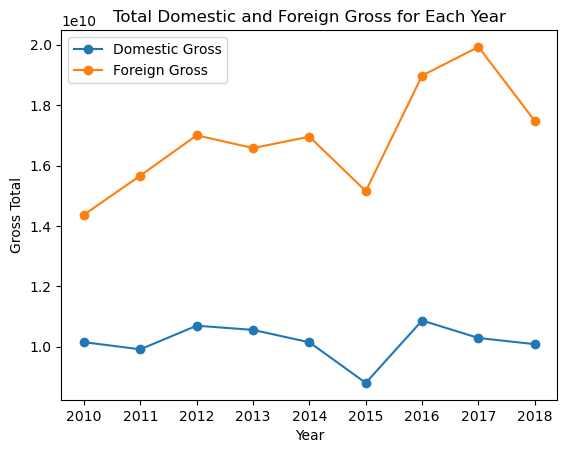

In [21]:

# Define the years of interest
years_of_interest = [2010, 2011, 2012,2013, 2014, 2015, 2016, 2017, 2018]

def calculate_totals(years_of_interest, movie_gross):
    """
    Calculate the total domestic and foreign gross for each year of interest.

    Args:
        years_of_interest (list): A list of years for which to calculate the totals.
        movie_gross (DataFrame): A DataFrame containing movie gross data.

    Returns:
        tuple: A tuple containing two dictionaries. The first dictionary represents the total domestic
               gross for each year, with the year as the key. The second dictionary represents the total
               foreign gross for each year, with the year as the key."""
domestic_totals = {}
foreign_totals = {}

# Iterate over each year of interest
for year in years_of_interest:
    # Filter the DataFrame for the current year
    filtered_data = movie_gross[movie_gross['year'] == year]
    
    # Calculate the sum of 'domestic_gross' for the filtered data
    domestic_total = filtered_data['domestic_gross'].sum()
    
    # Calculate the sum of 'foreign_gross' for the filtered data
    foreign_total = filtered_data['foreign_gross'].sum()
    
    # Store the total in the dictionaries with the year as the key
    domestic_totals[year] = domestic_total
    foreign_totals[year] = foreign_total

# Create lists of years and their respective domestic and foreign gross totals
years = list(domestic_totals.keys())
domestic_gross = list(domestic_totals.values())
foreign_gross = list(foreign_totals.values())

# Create a line graph
plt.plot(years, domestic_gross, marker='o', label='Domestic Gross')
plt.plot(years, foreign_gross, marker='o', label='Foreign Gross')

# Add labels and title to the graph
plt.xlabel('Year')
plt.ylabel('Gross Total')
plt.title('Total Domestic and Foreign Gross for Each Year')

# Add a legend with custom labels
plt.legend(['Domestic Gross', 'Foreign Gross'])

# Display the graph
plt.show()


In [22]:
#creating a new panda data frame from "bom.movie_gross.csv"csv file
movie_budget = pd.read_csv("tn.movie_budgets.csv", index_col=0)
#checking dataframe info
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [23]:
#checking data in the dataframe
movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
# Specify the columns to convert
columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Remove special characters ($) and handle missing or invalid values
movie_budget[columns_to_convert] = movie_budget[columns_to_convert].replace({'\$-': np.nan, ',': ''}, regex=True)

# Remove non-numeric characters using regular expressions
movie_budget[columns_to_convert] = movie_budget[columns_to_convert].replace({'[^0-9.]': ''}, regex=True)

# Convert the columns to floats
movie_budget[columns_to_convert] = movie_budget[columns_to_convert].astype(float)

# Verify the changes
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


In [33]:
#verifying changes
movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09


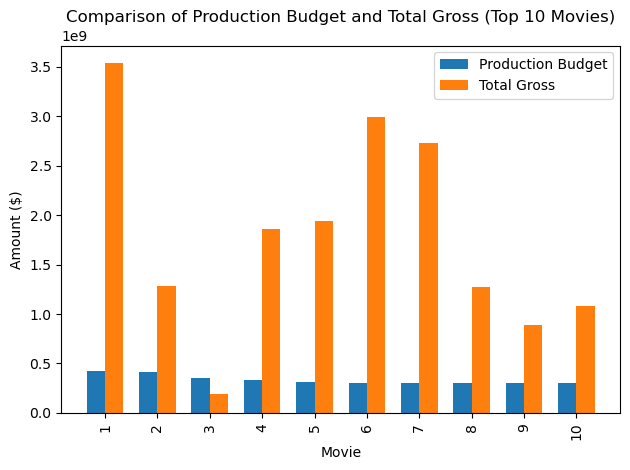

In [35]:

# Convert the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric types
movie_budget['production_budget'] = movie_budget['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Addition of domestic_gross and worldwide_gross
movie_budget['total_gross'] = movie_budget['domestic_gross'] + movie_budget['worldwide_gross']

# Sort the DataFrame by production budget in descending order
movie_budget_sorted = movie_budget.sort_values('production_budget', ascending=False)

# Extract the top 10 movies based on production budget and total gross
top_10_movies = movie_budget_sorted.head(10)

# Extract the required data
production_budget = top_10_movies['production_budget']
total_gross = top_10_movies['total_gross']
movies = top_10_movies.index.values

# Generate an array of indices for the x-axis
indices = np.arange(len(production_budget))

# Set the width of each bar
bar_width = 0.35

# Create the bar graph
plt.bar(indices, production_budget, bar_width, label='Production Budget')
plt.bar(indices + bar_width, total_gross, bar_width, label='Total Gross')

# Set the x-axis tick labels
plt.xticks(indices + bar_width / 2, movies, rotation='vertical')

plt.xlabel('Movie')
plt.ylabel('Amount ($)')
plt.title('Comparison of Production Budget and Total Gross (Top 10 Movies)')
plt.legend()
plt.tight_layout()
plt.show()


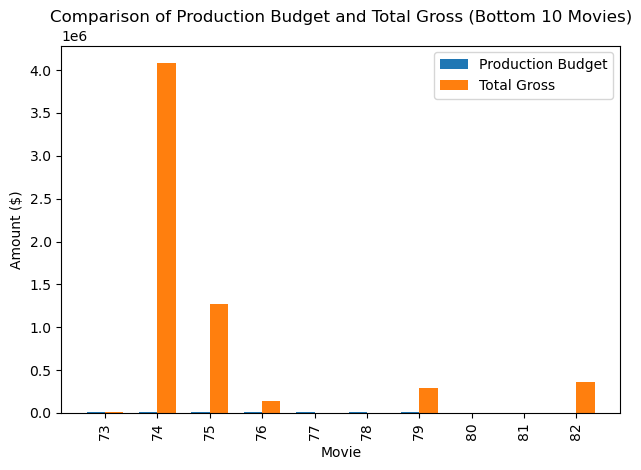

In [30]:

# Convert the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric types
movie_budget['production_budget'] = movie_budget['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Addition of domestic_gross and worldwide_gross
movie_budget['total_gross'] = movie_budget['domestic_gross'] + movie_budget['worldwide_gross']

# Sort the DataFrame by production budget in descending order
movie_budget_sorted = movie_budget.sort_values('production_budget', ascending=False)

# Extract the top 10 movies based on production budget and total gross
bottom_10_movies = movie_budget_sorted.tail(10)

# Extract the required data
production_budget = bottom_10_movies['production_budget']
total_gross = bottom_10_movies['total_gross']
movies = bottom_10_movies.index.values

# Generate an array of indices for the x-axis
indices = np.arange(len(production_budget))

# Set the width of each bar
bar_width = 0.35

# Create the bar graph
plt.bar(indices, production_budget, bar_width, label='Production Budget')
plt.bar(indices + bar_width, total_gross, bar_width, label='Total Gross')

# Set the x-axis tick labels
plt.xticks(indices + bar_width / 2, movies, rotation='vertical')

plt.xlabel('Movie')
plt.ylabel('Amount ($)')
plt.title('Comparison of Production Budget and Total Gross (Bottom 10 Movies)')
plt.legend()
plt.tight_layout()
plt.show()
